In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
file_path = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'
data = pd.read_csv(file_path)

In [7]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dropna(subset=['TotalCharges'], inplace=True)

In [8]:
label_encoder = LabelEncoder()
data['Churn'] = label_encoder.fit_transform(data['Churn'])  # Yes=1, No=0


In [19]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('customerID')

data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [10]:
X = data.drop(columns=['customerID', 'Churn'])
y = data['Churn']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")


Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

Confusion Matrix:
[[916 117]
 [159 215]]
ROC-AUC Score: 0.8357

Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
[[917 116]
 [182 192]]
ROC-AUC Score: 0.8156

Gradient Boosting
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.

In [14]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

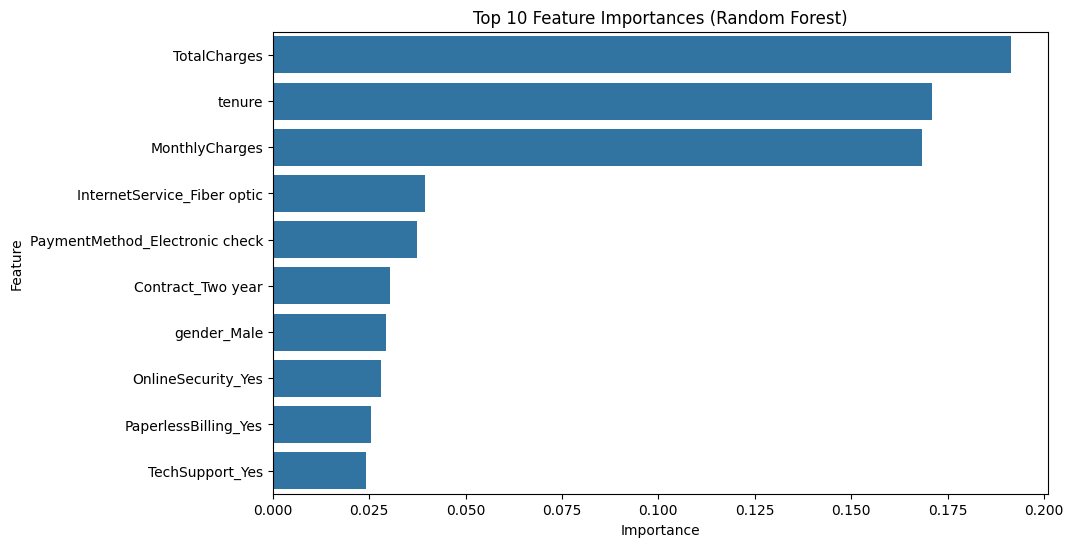

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=top_features.index)
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

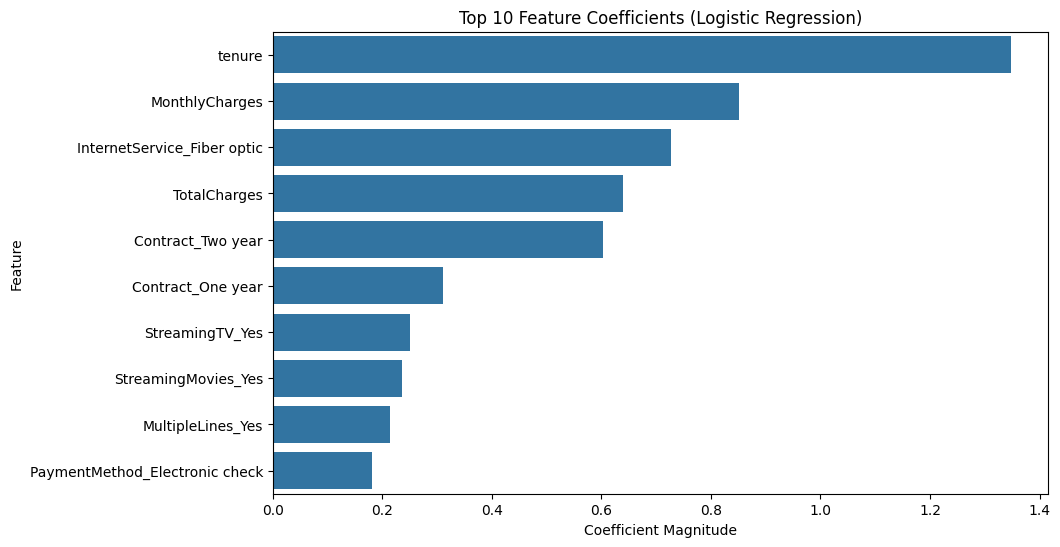

In [17]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_importances = pd.Series(np.abs(lr_model.coef_[0]), index=X.columns)
top_lr_features = lr_importances.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_lr_features, y=top_lr_features.index)
plt.title("Top 10 Feature Coefficients (Logistic Regression)")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.show()

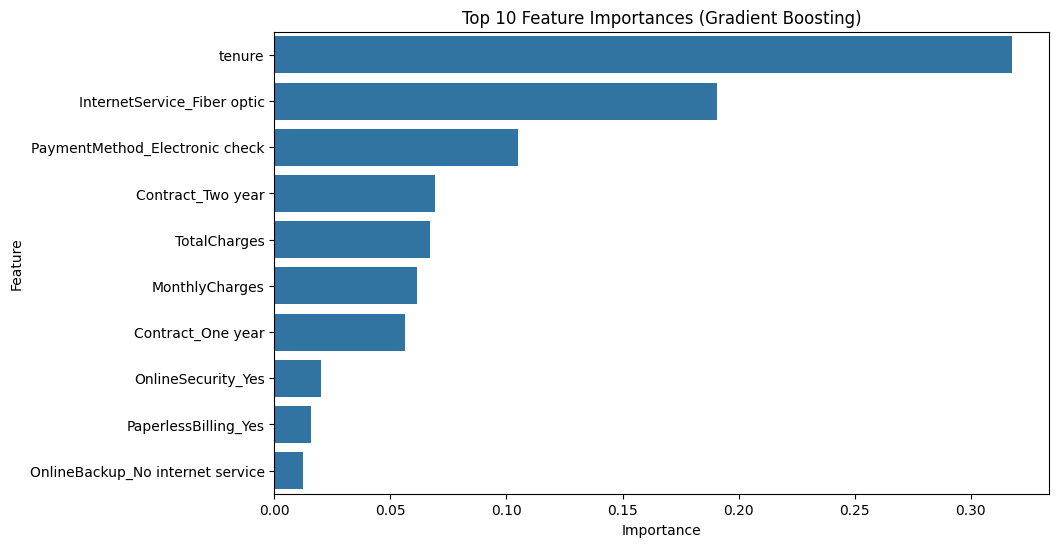

In [18]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_importances = pd.Series(gb_model.feature_importances_, index=X.columns)
top_gb_features = gb_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_gb_features, y=top_gb_features.index)
plt.title("Top 10 Feature Importances (Gradient Boosting)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()